In [15]:
import pandas as pd

In [16]:
file_path = '/Users/yoonjiha/Desktop/파란학기/bluesemesterdata/ver-test2'

In [17]:
df = pd.read_csv(file_path + "/chain-market.csv")
df

,_time,chainName,ath,athDate,atl,atlDate,cap,capChange24h,capChangeRatio24H,capRank,...,low24h,price,priceChangePercentage14d,priceChangePercentage1H,priceChangePercentage1Y,priceChangePercentage24H,priceChangePercentage30D,priceChangePercentage7d,supplyCirculating,totalVolume
0,2023-01-22T03:17:05.617Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3859684388,147701676,3.97905,22,...,12.710000,13.230000,28.957470,-0.485600,-66.135479,4.076443,49.739968,6.656563,292586163.8,286045792
1,2023-01-22T04:00:02.782Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3907744616,176277536,4.72408,22,...,12.740000,13.400000,30.548036,1.262951,-65.717793,5.109553,51.586867,7.972070,292586163.8,270717200
2,2023-01-22T05:00:02.824Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3927643247,184235063,4.92159,22,...,12.790000,13.400000,30.600500,0.109195,-65.704016,4.756726,51.647786,8.015461,292586163.8,278476575
3,2023-01-22T06:00:03.313Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3937783620,102299572,2.66719,22,...,12.930000,13.430000,30.878275,-0.008200,-65.631072,2.355746,51.970326,8.245199,292586163.8,256725694
4,2023-01-22T07:00:02.713Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3924998829,104038978,2.72285,22,...,12.930000,13.400000,30.615193,-0.020446,-65.700158,2.552304,51.664846,8.027613,292586163.8,248758707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,2023-05-08T07:00:03.646Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,404983121,-133274,-0.03290,103,...,0.698869,0.702410,-8.971425,0.211146,-81.515948,-0.091975,-10.970256,-10.630145,576419817.0,8394496
10057,2023-05-08T08:00:03.493Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,403448043,-670280,-0.16586,103,...,0.698869,0.700059,-9.276131,-0.328301,-81.577821,-0.197546,-11.268271,-10.929299,576419817.0,8384778
10058,2023-05-08T09:00:03.878Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,402169705,-1425917,-0.35330,103,...,0.697954,0.699504,-9.348001,-0.108675,-81.592415,-0.346475,-11.338563,-10.999859,576419817.0,8623022
10059,2023-05-08T10:00:03.496Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,403875678,753035,0.18680,103,...,0.696605,0.700127,-7.522812,0.080149,-80.316698,-0.052793,-9.789265,-9.837682,576419817.0,8790759


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _time                     10061 non-null  object 
 1   chainName                 10061 non-null  object 
 2   ath                       10061 non-null  float64
 3   athDate                   10061 non-null  object 
 4   atl                       10061 non-null  float64
 5   atlDate                   10061 non-null  object 
 6   cap                       10061 non-null  int64  
 7   capChange24h              10061 non-null  int64  
 8   capChangeRatio24H         10061 non-null  float64
 9   capRank                   10061 non-null  int64  
 10  change24h                 10061 non-null  float64
 11  changeRatio24H            10061 non-null  float64
 12  high24h                   10061 non-null  float64
 13  low24h                    10061 non-null  float64
 14  price 

In [19]:
df.chainName.unique()

array(['cosmos', 'juno', 'kava', 'osmosis'], dtype=object)

In [22]:
cos_df = pd.DataFrame()
juno_df = pd.DataFrame()
kava_df = pd.DataFrame()
osmo_df = pd.DataFrame()

In [21]:
chain = []
chain = df.chainName.unique()
chain

array(['cosmos', 'juno', 'kava', 'osmosis'], dtype=object)

## cap ARIMA 예측

### cap데이터만 뽑기

In [24]:
cos_df['date'] = df[df['chainName'] == 'cosmos']['_time'].values
cos_df['cap'] = df[df['chainName'] == 'cosmos']['cap'].values

juno_df['date'] = df[df['chainName'] == 'juno']['_time'].values
juno_df['cap'] = df[df['chainName'] == 'juno']['cap'].values

kava_df['date'] = df[df['chainName'] == 'kava']['_time'].values
kava_df['cap'] = df[df['chainName'] == 'kava']['cap'].values

osmo_df['date'] = df[df['chainName'] == 'osmosis']['_time'].values
osmo_df['cap'] = df[df['chainName'] == 'osmosis']['cap'].values

In [10]:
osmo_df

,_time,chainName,ath,athDate,atl,atlDate,cap,capChange24h,capChangeRatio24H,capRank,...,price,priceChangePercentage14d,priceChangePercentage1H,priceChangePercentage1Y,priceChangePercentage24H,priceChangePercentage30D,priceChangePercentage7d,supplyCirculating,totalVolume,date
7543,2023-01-22T03:17:05.624Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,441105317,16712148,3.93789,93,...,0.851087,17.261597,-0.343344,-91.404438,4.137371,18.705196,1.364371,518342446.0,27738815,2023-01-22T03:17:05.624Z
7544,2023-01-22T04:00:03.054Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,445711942,20456119,4.81031,94,...,0.860460,18.552975,1.091181,-91.309776,4.984556,20.012472,2.480676,518342446.0,28253361,2023-01-22T04:00:03.054Z
7545,2023-01-22T05:00:03.237Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,445916079,21965969,5.18126,94,...,0.860455,18.552294,0.066097,-91.309826,5.131523,20.011783,2.480087,518342446.0,28242500,2023-01-22T05:00:03.237Z
7546,2023-01-22T06:00:03.333Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,448153857,18379803,4.27662,92,...,0.863324,18.947547,0.167722,-91.280853,3.670148,20.411902,2.821756,518342446.0,27900750,2023-01-22T06:00:03.333Z
7547,2023-01-22T07:00:03.08Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,445747990,13944805,3.22944,93,...,0.859926,18.479397,-0.441181,-91.315170,2.669638,19.937988,2.417073,518342446.0,26127255,2023-01-22T07:00:03.08Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,2023-05-08T07:00:03.646Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,404983121,-133274,-0.03290,103,...,0.702410,-8.971425,0.211146,-81.515948,-0.091975,-10.970256,-10.630145,576419817.0,8394496,2023-05-08T07:00:03.646Z
10057,2023-05-08T08:00:03.493Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,403448043,-670280,-0.16586,103,...,0.700059,-9.276131,-0.328301,-81.577821,-0.197546,-11.268271,-10.929299,576419817.0,8384778,2023-05-08T08:00:03.493Z
10058,2023-05-08T09:00:03.878Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,402169705,-1425917,-0.35330,103,...,0.699504,-9.348001,-0.108675,-81.592415,-0.346475,-11.338563,-10.999859,576419817.0,8623022,2023-05-08T09:00:03.878Z
10059,2023-05-08T10:00:03.496Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,403875678,753035,0.18680,103,...,0.700127,-7.522812,0.080149,-80.316698,-0.052793,-9.789265,-9.837682,576419817.0,8790759,2023-05-08T10:00:03.496Z


In [31]:
cos_df['date'] = pd.to_datetime(cos_df['date'])
cos_df = cos_df.set_index('date')
juno_df['date'] = pd.to_datetime(juno_df['date'])
juno_df = juno_df.set_index('date')
kava_df['date'] = pd.to_datetime(kava_df['date'])
kava_df = kava_df.set_index('date')
osmo_df['date'] = pd.to_datetime(osmo_df['date'])
osmo_df = osmo_df.set_index('date')


cos_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2023-01-22 03:17:05.617000+00:00 to 2023-05-08 11:00:03.355000+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cap     2516 non-null   int64
dtypes: int64(1)
memory usage: 39.3 KB


In [32]:
osmo_df

,cap
date,
2023-01-22 03:17:05.624000+00:00,441105317
2023-01-22 04:00:03.054000+00:00,445711942
2023-01-22 05:00:03.237000+00:00,445916079
2023-01-22 06:00:03.333000+00:00,448153857
2023-01-22 07:00:03.080000+00:00,445747990
...,...
2023-05-08 07:00:03.646000+00:00,404983121
2023-05-08 08:00:03.493000+00:00,403448043
2023-05-08 09:00:03.878000+00:00,402169705


In [34]:
import matplotlib.pyplot as plt

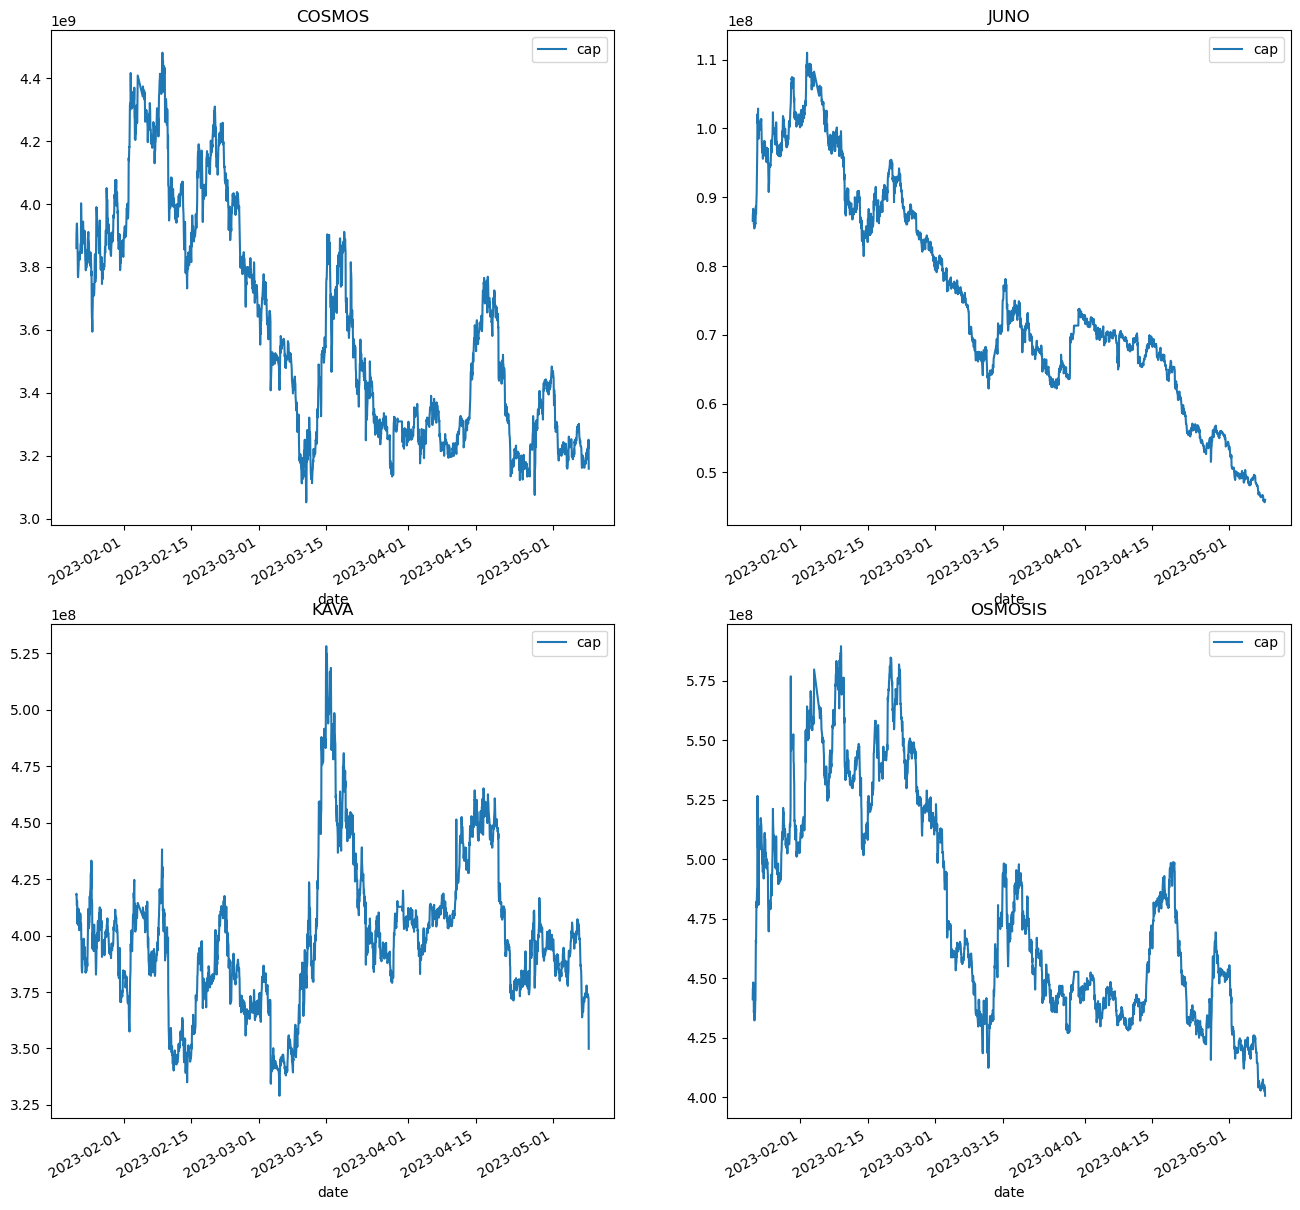

In [125]:
fig, axs = plt.subplots(2,2, figsize=(16,16))
ax1, ax2, ax3, ax4 = axs.flatten()

ax1 = cos_df.plot(ax=ax1)
ax1.set_title('COSMOS')
ax2 = juno_df.plot(ax=ax2)
ax2.set_title('JUNO')
ax3 = kava_df.plot(ax=ax3)
ax3.set_title('KAVA')
ax4 = osmo_df.plot(ax=ax4)
ax4.set_title('OSMOSIS')

plt.show()

### 정상성 test

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' %result[0])
    print('p-value: %f' %result[1])
    print('Critical values: ')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
        
print('ADF Test: time series')
adf_test(cos_df['cap'])
adf_test(cos_df['cap'].diff().dropna())

ADF Test: time series
ADF Statistics: -1.785648
p-value: 0.387610
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -11.012059
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [39]:
adf_test(juno_df['cap'])
adf_test(juno_df['cap'].diff().dropna())

ADF Statistics: -0.161203
p-value: 0.942991
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -21.922434
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [40]:
adf_test(kava_df['cap'])
adf_test(kava_df['cap'].diff().dropna())

ADF Statistics: -2.938824
p-value: 0.041016
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -51.095700
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [41]:
adf_test(osmo_df['cap'])
adf_test(osmo_df['cap'].diff().dropna())

ADF Statistics: -1.495496
p-value: 0.535738
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -52.190170
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [42]:
from statsmodels.tsa.stattools import kpss

In [43]:
def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS statistics: {statistic}')
    print(f'p_value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values: ')
    for key, value in critical_values.items():
        print(f' {key} : {value}')

print('KPSS Test: time series')
kpss_test(cos_df['cap'])
kpss_test(cos_df['cap'].diff().dropna())
# 0.05보다 작으면 안정적이지 않다는 뜻

KPSS Test: time series
KPSS statistics: 5.641576643887629
p_value: 0.01
num lags: 30
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.03941640962512661
p_value: 0.1
num lags: 15
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [44]:
kpss_test(kava_df['cap'])
kpss_test(kava_df['cap'].diff().dropna())

KPSS statistics: 1.0489195782108003
p_value: 0.01
num lags: 30
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.059551786424201114
p_value: 0.1
num lags: 13
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [45]:
kpss_test(juno_df['cap'])
kpss_test(juno_df['cap'].diff().dropna())

KPSS statistics: 7.242728991449374
p_value: 0.01
num lags: 30
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.12591309257857045
p_value: 0.1
num lags: 7
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [46]:
kpss_test(osmo_df['cap'])
kpss_test(osmo_df['cap'].diff().dropna())

KPSS statistics: 5.440133084347315
p_value: 0.01
num lags: 30
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.16787132996173032
p_value: 0.1
num lags: 5
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


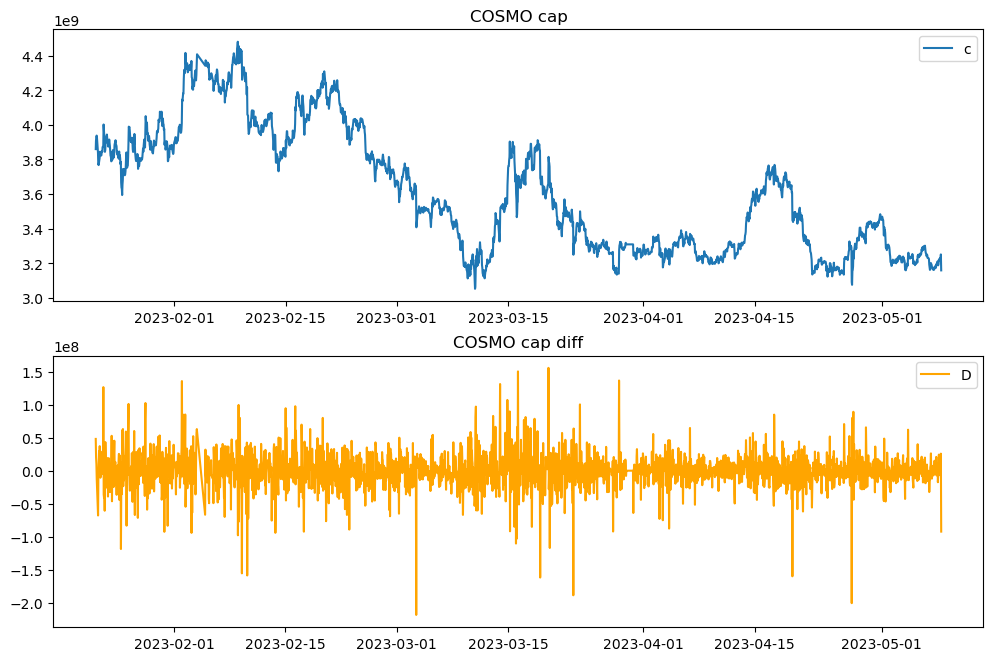

In [84]:
import matplotlib.pyplot as plt
# cap 차분 데이터
diff_series = cos_df.cap.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('COSMO cap')
plt.plot(cos_df)
plt.legend('cap data')
plt.subplot(312)
plt.title('COSMO cap diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


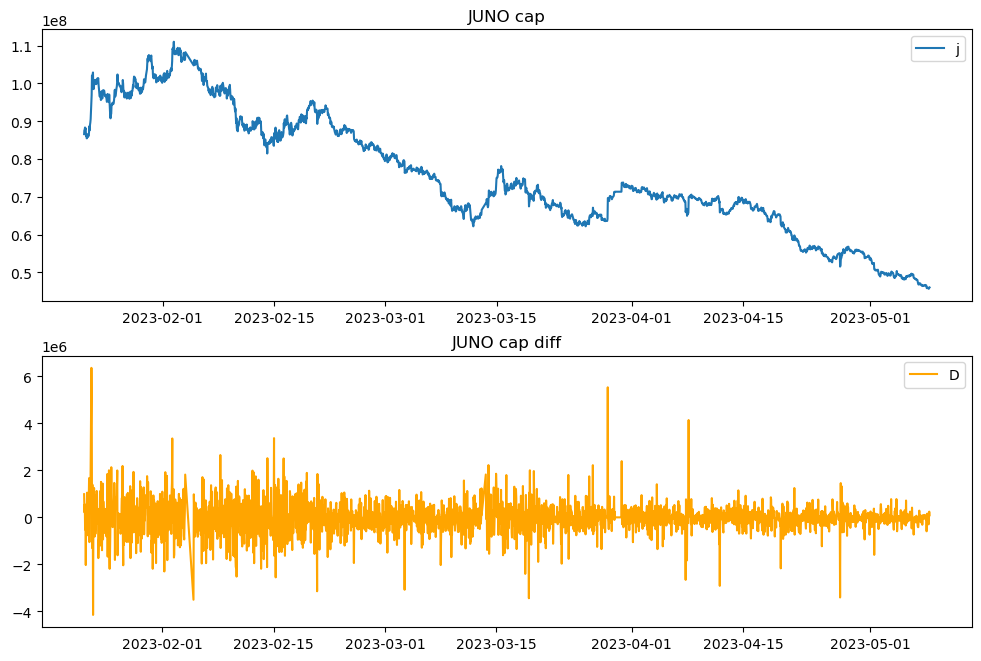

In [87]:
diff_series = juno_df.cap.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('JUNO cap')
plt.plot(juno_df)
plt.legend('juno Data')
plt.subplot(312)
plt.title('JUNO cap diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


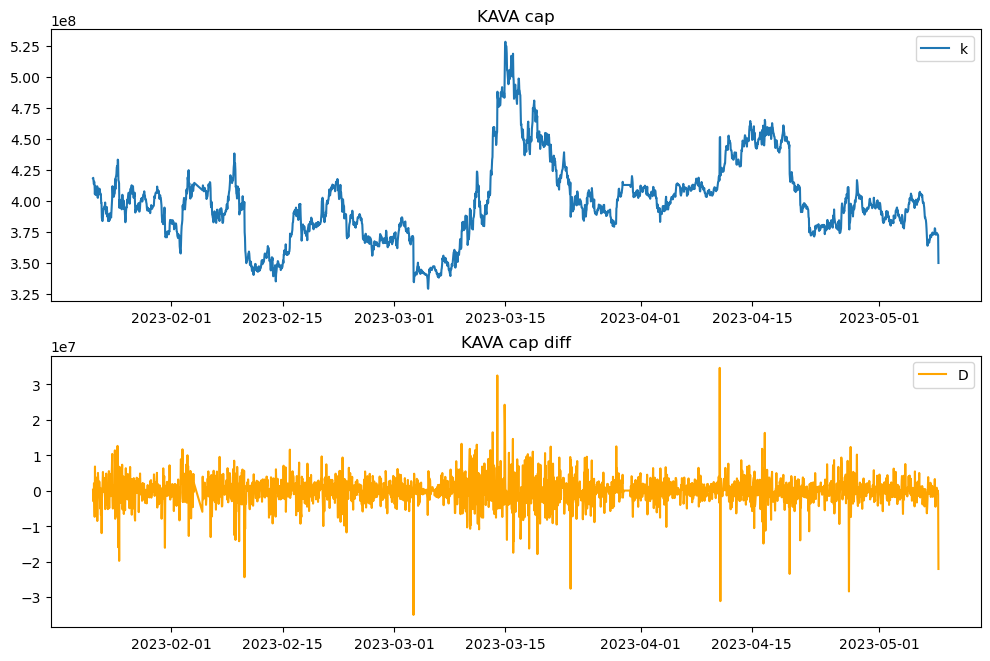

In [88]:
diff_series = kava_df.cap.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('KAVA cap')
plt.plot(kava_df)
plt.legend('kava Data')
plt.subplot(312)
plt.title('KAVA cap diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


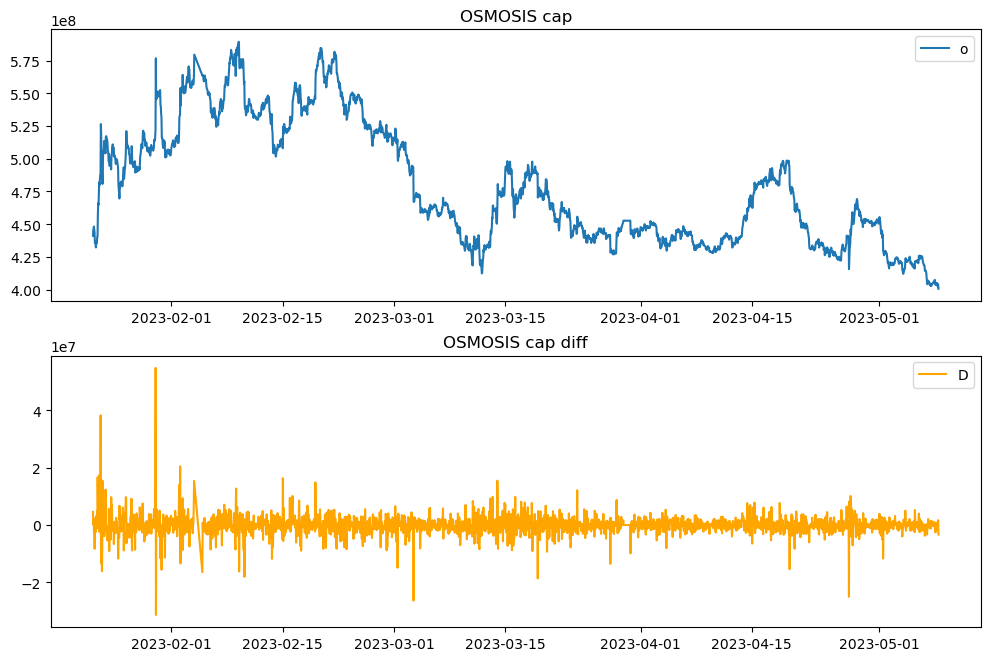

In [89]:
diff_series = osmo_df.cap.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('OSMOSIS cap')
plt.plot(osmo_df)
plt.legend('osmosis Data')
plt.subplot(312)
plt.title('OSMOSIS cap diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


### ARIMA 모수 설정

In [90]:
!pip install pmdarima

In [91]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### COSMOS ARIMA

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


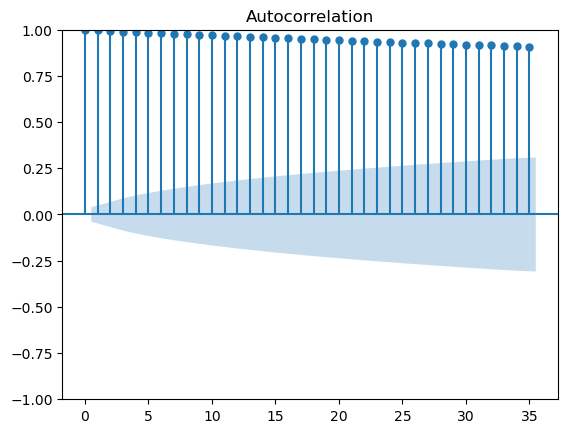

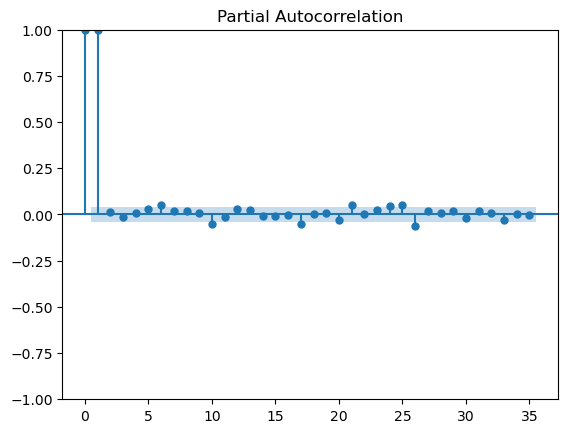

In [92]:
plot_acf(cos_df)
plot_pacf(cos_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


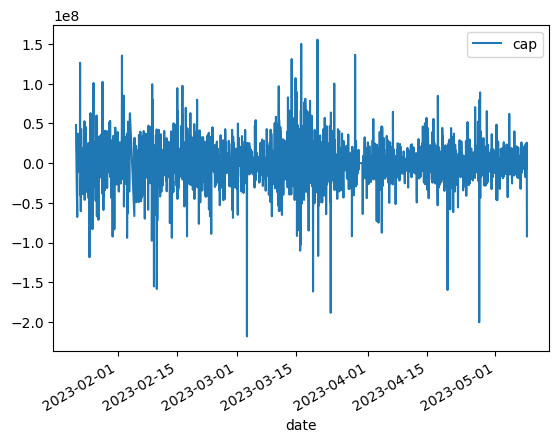

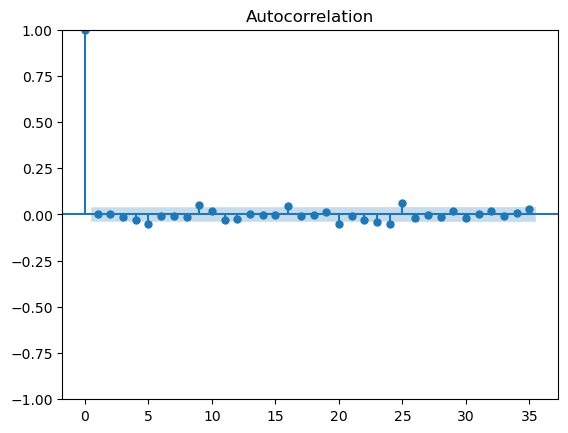

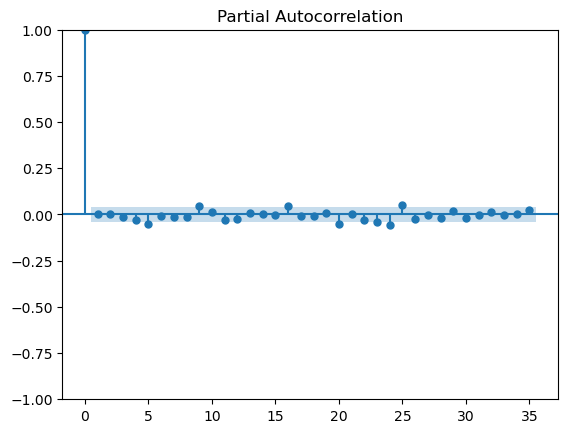

In [93]:
diff_1=cos_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [94]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(cos_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(cos_df)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=93217.376, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=93216.438, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=93217.929, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=93219.897, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=93216.408, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=93218.101, Time=0.83 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=93219.954, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=93220.462, Time=0.78 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=93217.923, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=93219.926, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=93221.956, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=93181.421, Time=3.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=93219.906, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=93221.906, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=93223.936, Time=0.39

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [95]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(cos_df, order=(2,1,3), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85247D+01    |proj g|=  9.40019D-02

At iterate    1    f=  1.85234D+01    |proj g|=  2.81323D-02

At iterate    2    f=  1.85234D+01    |proj g|=  4.60381D-02

At iterate    3    f=  1.85233D+01    |proj g|=  8.28521D-04

At iterate    4    f=  1.85233D+01    |proj g|=  3.42866D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4      6      1     0     0   3.429D-04   1.852D+01
  F =   18.523262725374540     

CONVERG

<Axes: xlabel='date'>

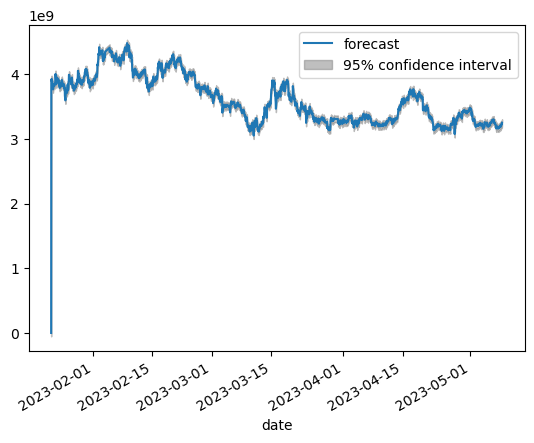

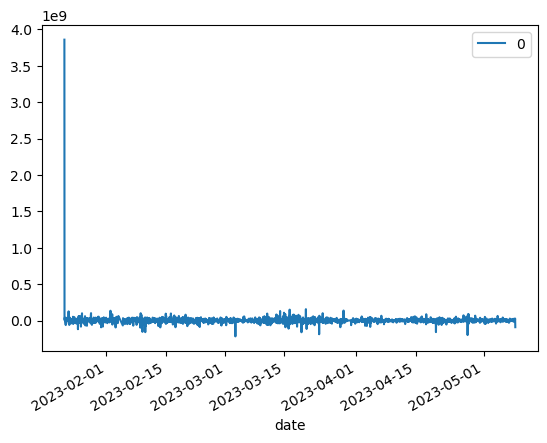

In [96]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [97]:
fore = model_fit.forecast(steps=5)
print(fore)

2516    3.156024e+09
2517    3.153807e+09
2518    3.152764e+09
2519    3.151461e+09
2520    3.150060e+09
Name: predicted_mean, dtype: float64


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


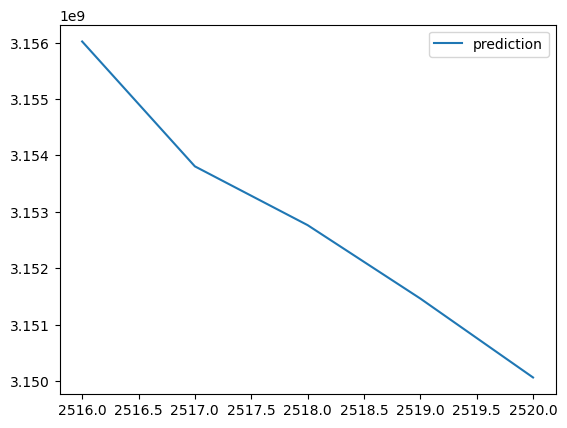

In [98]:
plt.plot(fore, label='prediction')
plt.legend()
plt.show()

### JUNO ARIMA

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


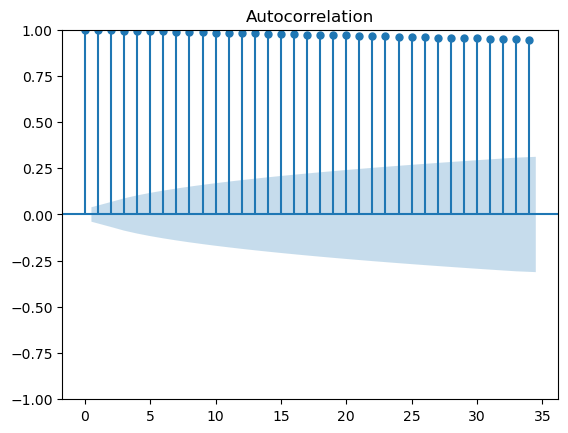

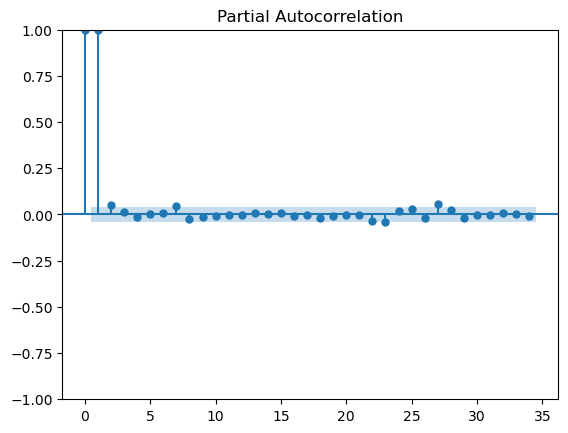

In [99]:
plot_acf(juno_df)
plot_pacf(juno_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


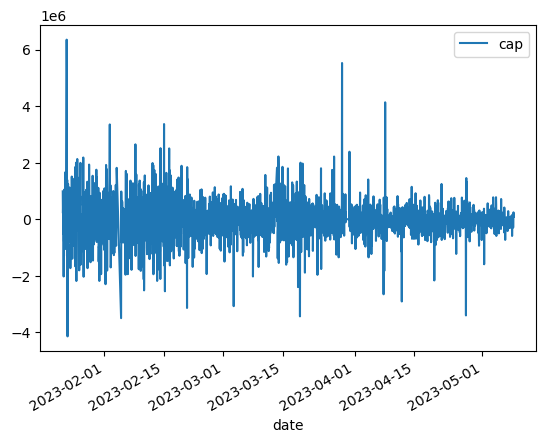

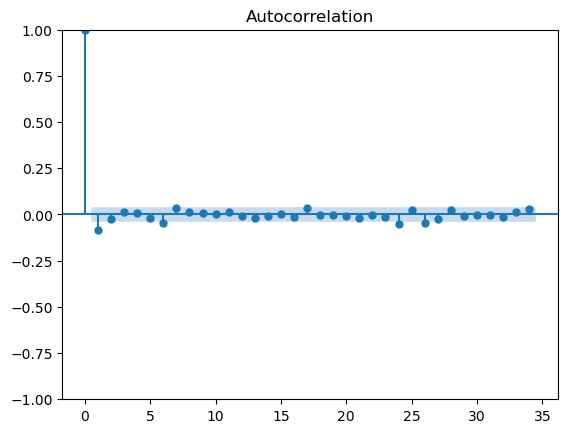

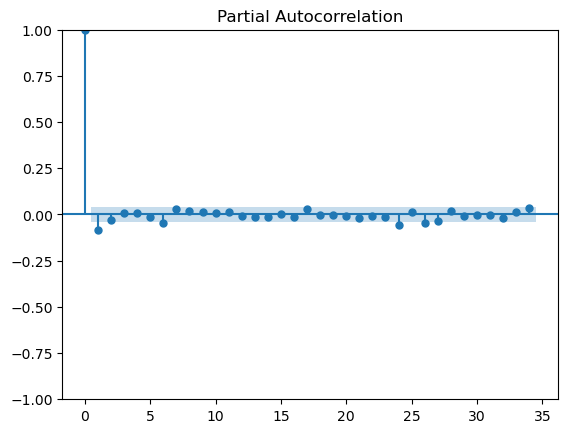

In [100]:
diff_1=juno_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show() 

In [101]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(juno_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(juno_df)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=74428.328, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=74430.400, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=74432.446, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=74433.268, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=74430.391, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=74432.402, Time=0.87 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=74434.094, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=74434.889, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=74432.409, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=74434.057, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=74436.101, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=74437.748, Time=0.46 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=74433.311, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=74435.310, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=74433.984, Time=1.19

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [103]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(juno_df, order=(0,1,0), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48372D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00   1.484D+01
  F =   14.837226423484916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:                    cap   No. Observations:                 2508
Model:               SARIMAX(0, 1, 0

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<Axes: xlabel='date'>

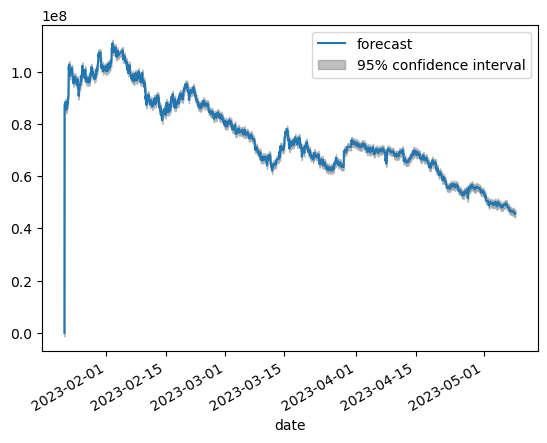

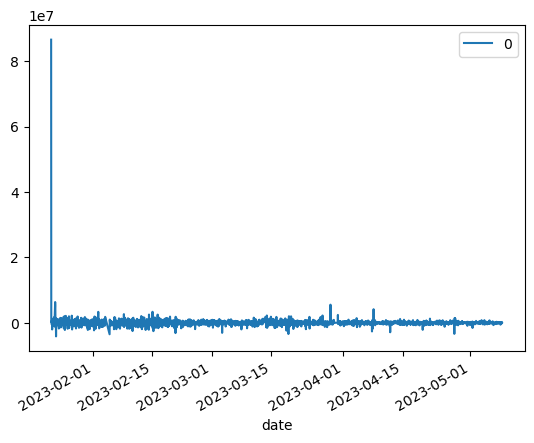

In [104]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [105]:
fore = model_fit.forecast(steps=5)
print(fore)

2508    4.597248e+07
2509    4.593749e+07
2510    4.590249e+07
2511    4.586748e+07
2512    4.583245e+07
Name: predicted_mean, dtype: float64


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


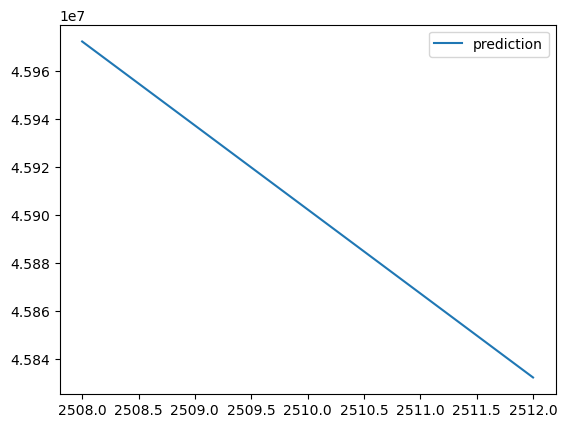

In [106]:
plt.plot(fore, label='prediction')
plt.legend()
plt.show()

### KAVA ARIMA

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


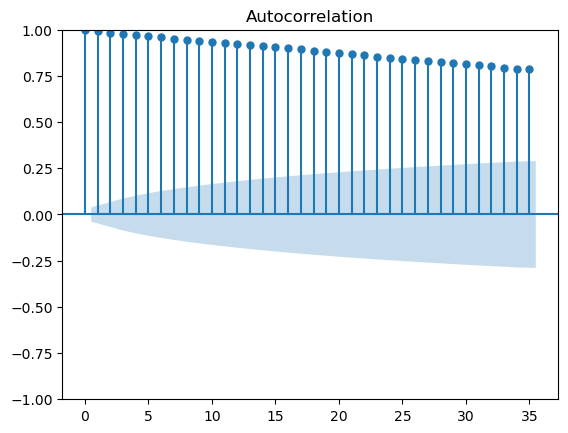

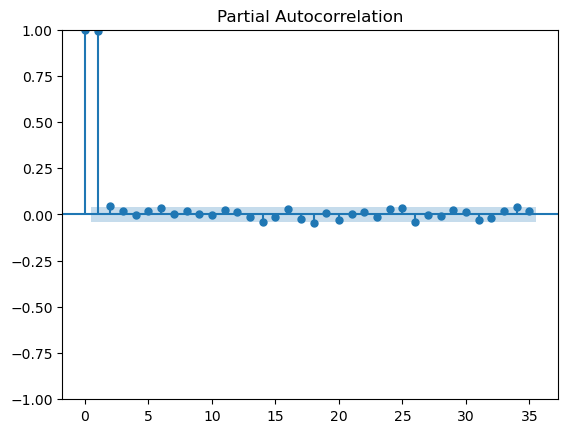

In [107]:
plot_acf(kava_df)
plot_pacf(kava_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


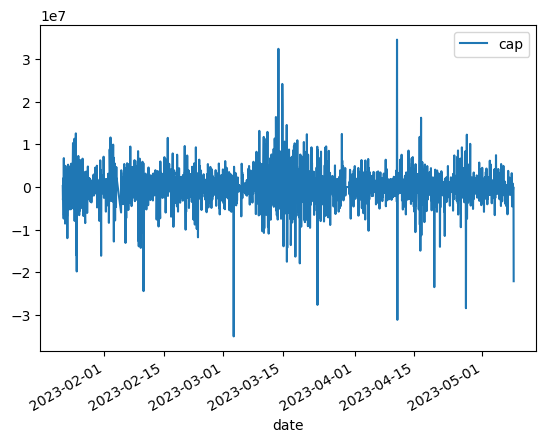

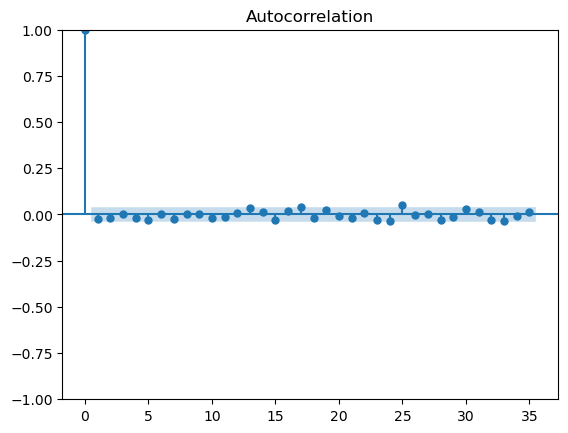

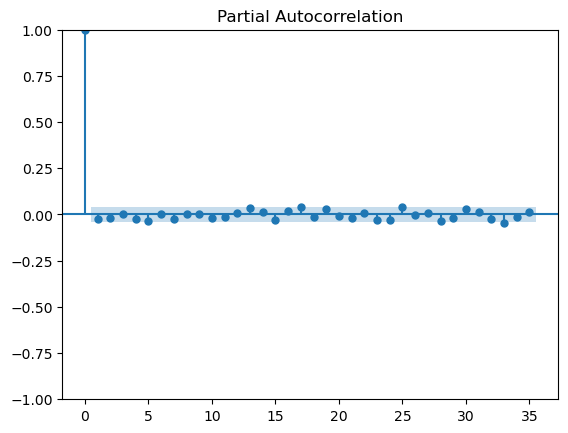

In [108]:
diff_1=kava_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show() 

In [109]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(kava_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(kava_df)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=83702.294, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=83704.069, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=83704.837, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=83706.592, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=83704.073, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=83705.242, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=83705.874, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=83708.262, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=83704.844, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=83706.861, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=83708.291, Time=0.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=83709.381, Time=0.87 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=83706.624, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=83708.625, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=83710.626, Time=0.38

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [110]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(kava_df, order=(0,1,0), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66134D+01    |proj g|=  3.55269D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.553D-10   1.661D+01
  F =   16.613384596125194     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:                    cap   No. Observations:                 2519
Model:               SARIMAX(0, 1, 0

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<Axes: xlabel='date'>

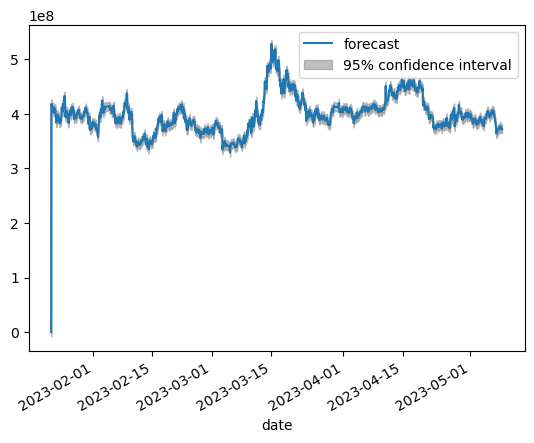

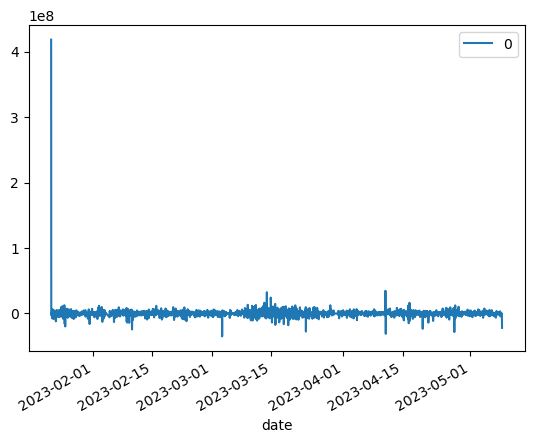

In [111]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [112]:
fore = model_fit.forecast(steps=5)
print(fore)

2519    3.497972e+08
2520    3.497389e+08
2521    3.496805e+08
2522    3.496221e+08
2523    3.495637e+08
Name: predicted_mean, dtype: float64


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


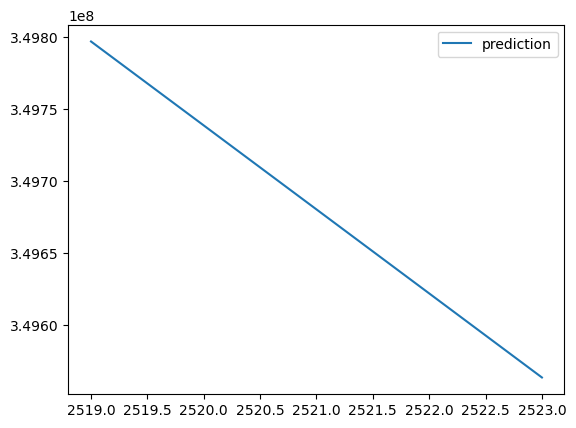

In [113]:
plt.plot(fore, label='prediction')
plt.legend()
plt.show()

### OSMOSIS ARIMA

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


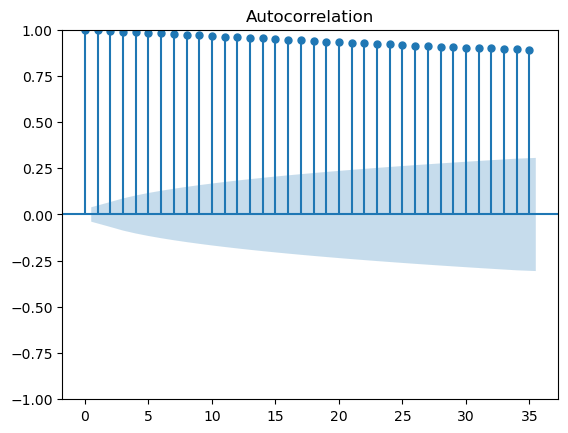

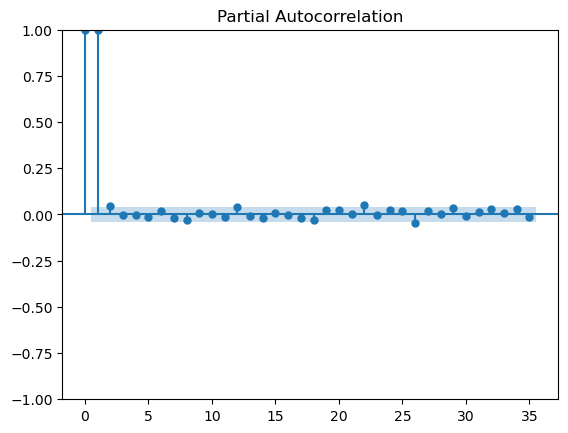

In [114]:
plot_acf(osmo_df)
plot_pacf(osmo_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


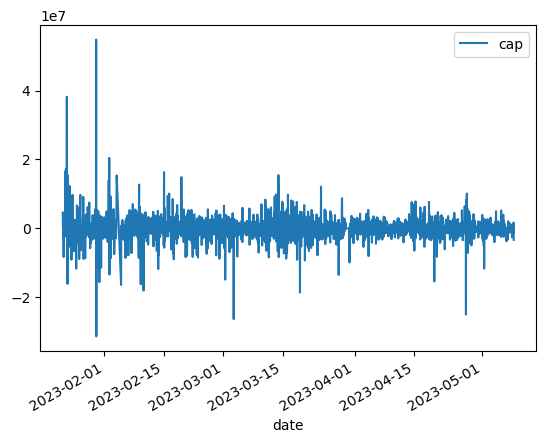

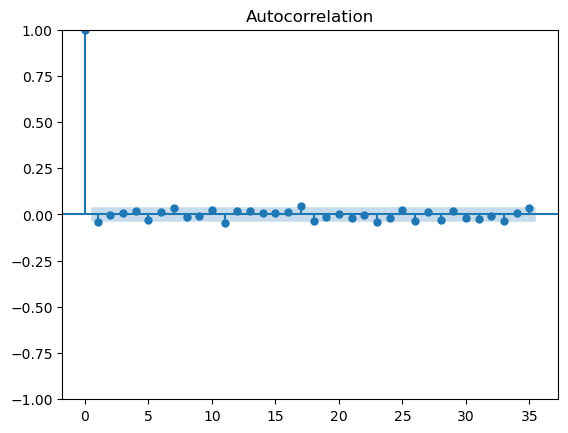

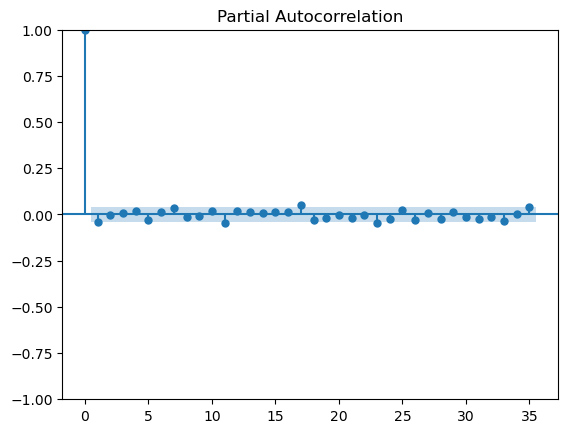

In [115]:
diff_1=osmo_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show() 

In [120]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(osmo_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(osmo_df)


 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=82951.575, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=82953.320, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=82955.323, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=82956.678, Time=0.25 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=82958.746, Time=0.28 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=82960.242, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=82953.322, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=82955.319, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=82956.668, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=82958.640, Time=0.37 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=82960.826, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=82955.320, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=82957.319, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=82959.308, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=82960.690, Time=0.33

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [119]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(osmo_df, order=(0,1,0), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64708D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00   1.647D+01
  F =   16.470814517403522     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:                    cap   No. Observations:                 2518
Model:               SARIMAX(0, 1, 0

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<Axes: xlabel='date'>

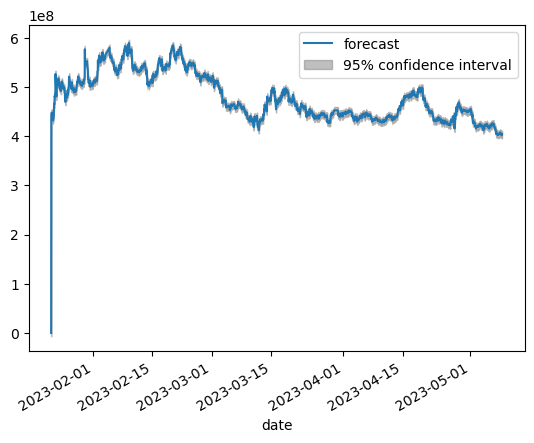

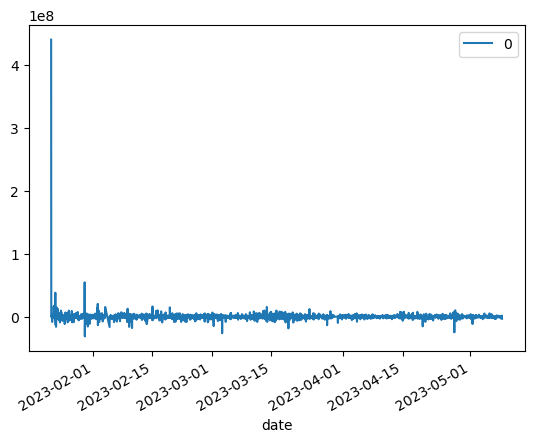

In [121]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [122]:
fore = model_fit.forecast(steps=5)
print(fore)

2518    4.004756e+08
2519    4.003823e+08
2520    4.002890e+08
2521    4.001957e+08
2522    4.001023e+08
Name: predicted_mean, dtype: float64


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


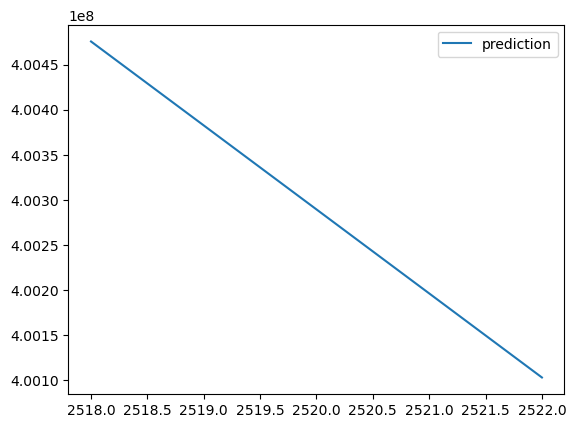

In [123]:
plt.plot(fore, label='prediction')
plt.legend()
plt.show()